In [1]:
# reload imported files automatically without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from lib import *
from humanfriendly import format_size
from functools import reduce

In [3]:
all_online_networks = pd.read_csv(DATA_DIR_PATH / "online_social_networks.csv")
all_offline_networks = pd.read_csv(DATA_DIR_PATH / "offline_social_networks.csv")

In [4]:
small_online_networks = all_online_networks["nodes_qcut"] == "small"
medium_online_networks = all_online_networks["nodes_qcut"] == "medium"
large_online_networks = all_online_networks["nodes_qcut"] == "large"

In [5]:
all_online_networks.head()

group          name   nodes   edges  avg_degree  std_dev_degree  \
0      douban        douban  154908  327162        4.22           11.75   
1  ego_social    facebook_0     333    2519       15.13           15.51   
2  ego_social  facebook_107    1034   26749       51.74           47.00   
3  ego_social  facebook_348     224    3192       28.50           22.37   
4  ego_social  facebook_414     150    1693       22.57           13.06   

   largest_eigenvalue_hashimoto  random_walk_mixing_time  \
0                         39.78                   103.63   
1                         35.79                   172.26   
2                        122.05                    51.91   
3                         48.64                    81.92   
4                         34.42                   243.01   

   degree_assortativity  global_clustering  diameter  \
0                 -0.18               0.01         9   
1                  0.24               0.43        11   
2                  0.43               0.50         9   
3                  0.22               0.49         9   
4                  0.31               0.65         7   

   relative_size_of_largest_component        kind        mode  \
0                                1.00  Undirected  Unipartite   
1                                0.97  Undirected  Unipartite   
2                                1.00  Undirected  Unipartite   
3                                1.00  Undirected  Unipartite   
4                                0.99  Undirected  Unipartite   

       node_properties edge_properties  gml_file_size nodes_qcut  \
0                  NaN             NaN        3460300      large   
1  name  feat  circles             NaN          22528      small   
2  name  feat  circles             NaN         121856     medium   
3  name  feat  circles             NaN          19456      small   
4  name  feat  circles             NaN          11264      small   

   gml_file_size_bytes  
0              3460300  
1                22528  
2               121856  
3                19456  
4                11264

In [7]:
all_online_networks[all_online_networks["mode"] == "Bipartite"]

group                         name    nodes     edges  \
47          ego_social  gplus_104076158580173410325        8         7   
151      flickr_groups                flickr_groups   499610   8545307   
153         foursquare       NYC_restaurant_checkin     4936     27149   
154         foursquare          NYC_restaurant_tips     6410     10377   
157  foursquare_global            foursquare_global  3935215  22809624   
159             lastfm                         band   175069  19150868   
160             lastfm                         song  1085612  19150868   

     avg_degree  std_dev_degree  largest_eigenvalue_hashimoto  \
47         1.75            1.98                          1.00   
151       34.21          194.73                        579.50   
153       11.00           14.61                         10.57   
154        3.24            5.67                          9.47   
157       11.59           62.44                        163.10   
159      218.78         2524.08                        359.89   
160       35.28          915.72                        589.26   

     random_walk_mixing_time  degree_assortativity  global_clustering  \
47                      0.01                 -1.00                0.0   
151                   207.93                 -0.09                0.0   
153                    40.65                  0.30                0.0   
154                    92.11                 -0.04                0.0   
157                  1016.53                  0.02                0.0   
159                    12.99                 -0.27                0.0   
160                    11.34                 -0.44                0.0   

     diameter  relative_size_of_largest_component        kind       mode  \
47          2                                1.00  Undirected  Bipartite   
151        18                                0.94  Undirected  Bipartite   
153        13                                0.99  Undirected  Bipartite   
154        19                                0.84  Undirected  Bipartite   
157        14                                1.00  Undirected  Bipartite   
159         6                                1.00  Undirected  Bipartite   
160         6                                1.00  Undirected  Bipartite   

                                       node_properties  \
47                                 name  feat  circles   
151                                                NaN   
153                                is_user  name  tags   
154                                is_user  name  tags   
157  is_user  name  latitude  longitude  venue_cat ...   
159                                                NaN   
160                                                NaN   

               edge_properties  gml_file_size nodes_qcut  gml_file_size_bytes  
47                         NaN            902      small                  902  
151                        NaN       44669337      large             44669337  
153                        NaN         223232      large               223232  
154                   tip_text         531456      large               531456  
157  timestap  timezone_offset      239180185      large            239180185  
159               weight  time      109995622      large            109995622  
160               weight  time      150994944      large            150994944

In [8]:
# calculate dataset sizes per group
all_online_networks.groupby("nodes_qcut").agg({"gml_file_size": [lambda val: format_size(val.sum(), binary=True), "count", "median"]})

gml_file_size                 
              <lambda_0> count     median
nodes_qcut                               
large          11.08 GiB    57  2306867.0
medium         30.55 MiB    56   382976.0
small           1.76 MiB    57    23552.0

In [9]:
# get total size of all online network datasets
format_size(reduce(lambda x, y: x + y, all_online_networks["gml_file_size"]), binary=True)

'11.11 GiB'

Text(0.5, 1.0, 'Counts of network modes of online networks')

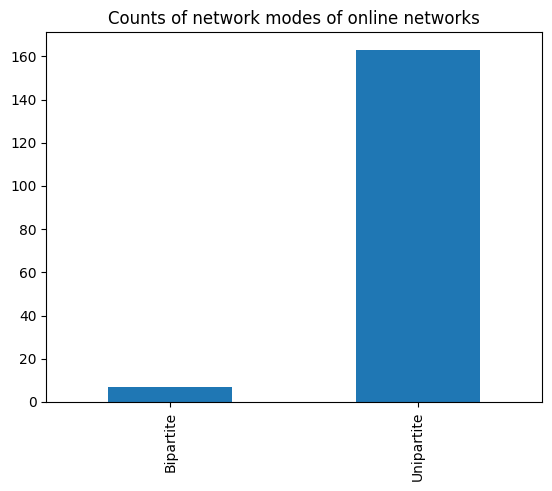

In [10]:
all_online_networks["mode"].value_counts().sort_values().plot(kind = 'bar')
plt.title("Counts of network modes of online networks")

Text(0.5, 1.0, 'Distribution of Network Diameters')

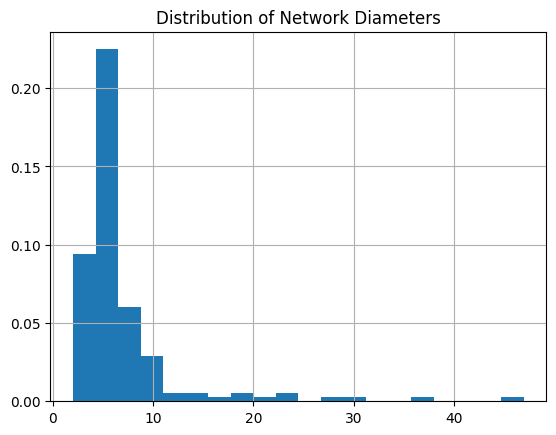

In [11]:
all_online_networks["diameter"].hist(density = True, bins = 20)
plt.title("Distribution of Network Diameters")

Calculating the distribution of the global clustering coefficients is important, because
the **global similarity coefficient** is the same as global clustering coefficient,
see page 4 (4):

>Global similarity. From the global perspective both local clustering and local closure lead to the same conclusion   
that the corresponding global measure is just the fraction of triples that can be closed to make a triangle.  
This implies that the same quantity is also the proper global measure of the extent to which relations are driven  
by similarity. In other words, global similarity coefficient is equal to the standard global clustering coefficient.

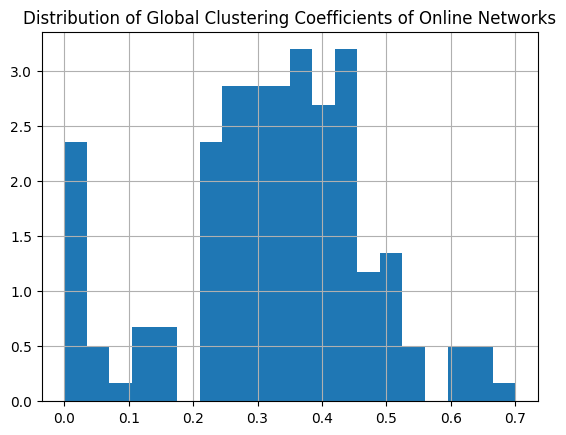

In [15]:
all_online_networks["global_clustering"].hist(density = True, bins = 20)
plt.title("Distribution of Global Clustering Coefficients of Online Networks")
plt.savefig(FIGURE_DIR_PATH / 'global_clustering_coefficients.svg', format='svg', dpi=1200)
plt.savefig(FIGURE_DIR_PATH / 'global_clustering_coefficients.pdf', format='pdf', dpi=1200)
plt.savefig(FIGURE_DIR_PATH / 'global_clustering_coefficients.png', format='png', dpi=1200)

# **Todo** Explore further